In [1]:
#imports
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.stats import pearsonr

# Analyse de l'Impact de l'Effort Culinaire sur la Popularité des Recettes: Analyse bivariée

## Objectif de l'étude

Cette analyse vise à comprendre comment l'effort requis pour réaliser une recette influence sa popularité auprès des utilisateurs.

Le référentiel sur lequel nous travaillons pour ces analyses est le dataset produit à la suite des deux analyses effectuées précédemment.

Il est constitué des variables suivantes 'log_minutes', 'n_ingredients', 'avg_words_per_step', 'bayes_mean', 'effort_score', 'wilson_lb', 'n_interactions'.

Les données proviennent du dataset analysis_dataset.csv.


## Contexte

Le dataset utilisé pour l'étude :

* `analysis_dataset.csv`.

Les variables utilisées pour cette étude :

* `log_minutes`: log de la durée.

* `n_ingredients` : nombre d'ingrédients utilisé par recette.

* `avg_words_per_step` : nombre de mots par étape.

* `bayes_mean` : score de popularité selon la moyenne de Bayes calculée à partir des variables `avg_rating` et `n_interactions`.

* `effort_score` : Score d'effort calculé à partir des variables `minutes`, `avg_words_per_step`, `ingedients`.

* `wilson_lb` : Score de popularité dérivé de `recipe_id` et `rating`.

* `n_interactions` : Nombre d'intéractions par recette.



In [2]:
# Nettoyage des données
recipe = pd.read_csv("analysis_dataset.csv")
recipe.columns
colonnes = ['log_minutes', 'n_ingredients', 'avg_words_per_step', 'bayes_mean', 'effort_score', 'wilson_lb', 'n_interactions']
recipe = recipe[colonnes]
recipe.columns
recipe_clean = recipe.dropna()
print(f"Données avant nettoyage: {len(recipe)}, après: {len(recipe_clean)}")
recipe = recipe_clean

Données avant nettoyage: 221813, après: 217062


## Démarche analytique

### 1. **Analyse de corrélation**

Dans cette étape on détermine la matrice de corrélation, afin d'avoir une vue d'ensemble de la relation entre l'effort et la popularité.

Ainsi, nous posons les hypothèses suivantes :

* $H_0$ : Il n'y a pas de corrélation entre l'effort culinaire et la popularité des recettes.

* $H_1$ : Il existe une corrélation (positive ou négative) entre l'effort culinaire et la popularité des recettes.

Corrélation effort-popularité: -0.026 (p=4.6841129083503985e-34)
Corrélation effort-popularité: -0.039 (p=7.744237353369298e-75)


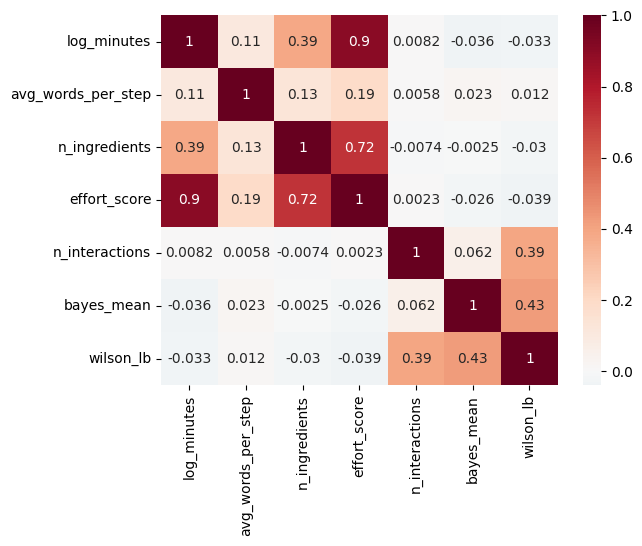

In [3]:
# Exemple d'analyse rapide
import matplotlib.pyplot as plt
import seaborn as sns

'''
# Corrélation
correlation_matrix = recipe.corr()
sns.heatmap(correlation_matrix, annot=True)
'''

correlation_vars = [
    'log_minutes', 'avg_words_per_step', 'n_ingredients', 'effort_score',
    'n_interactions', 'bayes_mean', 'wilson_lb'
]
correlation_matrix = recipe[correlation_vars].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0)

# Régression simple
from scipy.stats import pearsonr
corr, p_value = pearsonr(recipe['effort_score'], recipe['bayes_mean'])
print(f"Corrélation effort-popularité: {corr:.3f} (p={p_value})")

corr2, p_value2 = pearsonr(recipe['effort_score'], recipe['wilson_lb'])
print(f"Corrélation effort-popularité: {corr2:.3f} (p={p_value2})")

#### Résultats obtenus :

**Corrélations effort-popularité :**
- effort_score vs bayes_mean : r = -0.026, p < 0.001
- effort_score vs wilson_lb : r = -0.039, p < 0.001

#### Interprétations statistiques :

**Significativité statistique :**
- Les p-valeurs < 0.001 indiquent que les corrélations sont statistiquement significatives
- Nous rejetons H₀ : il existe bien une corrélation (≠ 0), mais très faible.

**Significativité pratique :**
- Les coefficients r ≈ -0.03 et -0.04 indiquent une relation pratiquement négligeable
- R² ≈ 0.0007 : seulement 0.07% de la variance expliquée
- Effet de taille d'échantillon : avec n > 200k, même des corrélations minimes deviennent significatives

#### Conclusion:

Possibilité : Bien que statistiquement significative, la corrélation entre effort culinaire et popularité est pratiquement inexistante. L'effet observé s'explique par la très grande taille d'échantillon qui rend significatives des relations négligeables. Ainsi, l'effort culinaire n'influence pas de manière notable la popularité des recettes.

Autre approche :Nous allons réaliser d'autres types d'analyse afin de quantifier plus précisement la correlation entre l'effort culinaire et le score de popularité (bayes_mean), puisqu'elle existe, bien qu'infime.

### 2. **Analyse de régression**

L'analyse précédente nous indiquait qu'il y avait une relation légère.
Dans cette nouvelle analyse, nous allons tenter de quantifier l'impact, et de comprendre celui d'autres variables.

Ainsi, nous posons les hypothèses suivantes :

* $H_0$ : Le coefficient de régression de l'effort sur la popularité est nul $\leftrightarrow \beta = 0 $, signifiant que l'effort ne permet pas de prédire la popularité.

* $H_1$ : L'effort permet de prédire la popularité.

In [4]:
# Nettoyage des données
recipe_clean = recipe.dropna()
print(f"Données avant nettoyage: {len(recipe)}, après: {len(recipe_clean)}")

# Vérification des données
print(recipe_clean.describe())

# Régression linéaire simple
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

# Modèle 1: effort -> popularité
X = recipe_clean[['effort_score']]
y = recipe_clean['bayes_mean']

model1 = LinearRegression().fit(X, y)
y_pred = model1.predict(X)
r2 = r2_score(y, y_pred)

print(f"R² effort->popularité: {r2:.3f}")
print(f"Coefficient: {model1.coef_[0]:.3f}")

# Modèle 2: avec variables de contrôle
X_multi = recipe_clean[['effort_score', 'log_minutes', 'n_ingredients']]
model2 = LinearRegression().fit(X_multi, y)
r2_multi = r2_score(y, model2.predict(X_multi))

print(f"R² modèle complet: {r2_multi:.3f}")
print(f"Coefficients: {model2.coef_}")

Données avant nettoyage: 217062, après: 217062
         log_minutes  n_ingredients  avg_words_per_step     bayes_mean  \
count  217062.000000  217062.000000       217062.000000  217062.000000   
mean        3.529936       9.031724           10.410797       4.658273   
std         0.940282       3.715991            3.503661       0.104890   
min         0.000000       1.000000            1.000000       3.145972   
25%         2.995732       6.000000            8.000000       4.604937   
50%         3.555348       9.000000           10.000000       4.695846   
75%         4.094345      11.000000           12.250000       4.721192   
max         5.886104      43.000000          144.000000       4.983437   

        effort_score      wilson_lb  n_interactions  
count  217062.000000  217062.000000   217062.000000  
mean       34.855176       0.351307        4.698303  
std         7.187036       0.199229       16.264544  
min         0.872912       0.000000        1.000000  
25%        30.83

**Modèle simple : on essaye d'exprimer le score de popularité (bayes_mean), à partir de la variable de score d'effort uniquement.**
- R² = 0.001 (0.1% de variance expliquée).
- Coefficient = -0.000 (impact négligeable).


**Modèle avec contrôles : on essaye d'exprimer la popularité à partir des features : `effort_score`, `log_minutes`, `n_ingredients`**
- R² = 0.002 (0.2% de variance expliquée)


#### Conclusion

L'effort culinaire a un impact quasi-nul sur la popularité des recettes. Les modèles expliquent très peu de variance, suggérant que :

- La popularité dépend d'autres facteurs non mesurés (goût, présentation, marketing)
- L'effort n'est pas un prédicteur significatif de succès
- Le temps et les ingrédients ont un léger effet négatif sur la popularité

Cette analyse confirme que les recettes simples tendent à être légèrement plus populaires.


L'effort seul n'explique presque rien de la popularité. Il faut donc réaliser d'autres analyses.

### 3. **Analyse segmentée par quartiles** Avec test ANOVA

#### Axe d'analyse
Les relations peuvent être **non-linéaires**.

Diviser en quartiles peut révèler des patterns cachés que la régression linéaire ne peut pas détecter.

La segmentation des quartiles, dans notre cas, désigne les différents niveaux d'efforts (Q1 (Faible), Q2 (Moyen-),Q3 (Moyen+),Q4 (Élevé)).


Ainsi, nous posons les hypothèses suivantes :

* $H_0$ : On suppose que toutes les catégories d'effort (faible, moyenne, élevé) ont la même popularité moyenne. À noter que les variables désignant la popularité moyenne sont `bayes_mean` et `wilson_lb`.

* $H_1$ : Au moins une catégorie a une popularité différente.


#### Méthodologie :
1. Division des recettes en 4 groupes d'effort égaux.
2. Comparaison des moyennes de popularité.
3. Test ANOVA pour vérifier les différences.

Analyse par quartiles d'effort:
                bayes_mean               wilson_lb n_interactions  \
                      mean    std  count      mean           mean   
effort_quartile                                                     
Q1 (Faible)          4.665  0.105  54266     0.362          4.562   
Q2 (Moyen-)          4.655  0.108  54265     0.355          4.846   
Q3 (Moyen+)          4.654  0.105  54265     0.347          4.778   
Q4 (Élevé)           4.660  0.102  54266     0.342          4.607   

                effort_score          
                         min     max  
effort_quartile                       
Q1 (Faible)            0.873  30.835  
Q2 (Moyen-)           30.835  35.641  
Q3 (Moyen+)           35.641  39.629  
Q4 (Élevé)            39.629  69.721  


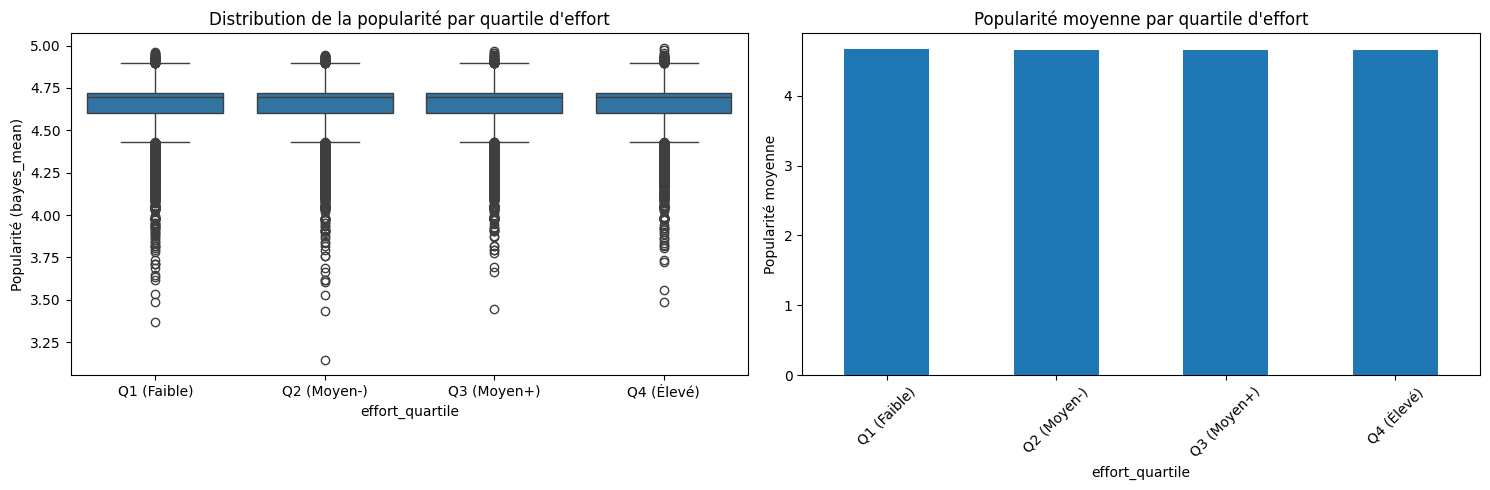


Test ANOVA - F-statistic: 119.973, p-value: 0.000


In [5]:
# Création des quartiles d'effort
recipe['effort_quartile'] = pd.qcut(recipe['effort_score'], q=4, labels=['Q1 (Faible)', 'Q2 (Moyen-)', 'Q3 (Moyen+)', 'Q4 (Élevé)'])

# Analyse par quartiles
quartile_analysis = recipe.groupby('effort_quartile', observed=False).agg({
    'bayes_mean': ['mean', 'std', 'count'],
    'wilson_lb': 'mean',
    'n_interactions': 'mean',
    'effort_score': ['min', 'max']
}).round(3)

print("Analyse par quartiles d'effort:")
print(quartile_analysis)

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Box plot popularité par quartile
sns.boxplot(data=recipe, x='effort_quartile', y='bayes_mean', ax=axes[0])
axes[0].set_title('Distribution de la popularité par quartile d\'effort')
axes[0].set_ylabel('Popularité (bayes_mean)')

# Moyennes par quartile
quartile_means = recipe.groupby('effort_quartile', observed=False)['bayes_mean'].mean()
quartile_means.plot(kind='bar', ax=axes[1])
axes[1].set_title('Popularité moyenne par quartile d\'effort')
axes[1].set_ylabel('Popularité moyenne')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Test statistique (ANOVA)
from scipy.stats import f_oneway
groups = [group['bayes_mean'].values for name, group in recipe.groupby('effort_quartile', observed=False)]
f_stat, p_value = f_oneway(*groups)
print(f"\nTest ANOVA - F-statistic: {f_stat:.3f}, p-value: {p_value:.3f}")

### Interprétation du test ANOVA

F-statistic: 119.973, p-value: 0.000

## Conclusion statistique dans notre contexte :
- Les différences sont significatives entre les quartiles d'effort (p < 0.001)
- F-statistic élevé (119.973) indique des différences substantielles entre groupes
- Les quartiles d'effort ont des moyennes de popularité statistiquement distinctes

Implications pratiques :
- L'effort a un impact mesurable quand on segmente par quartiles
-Effet non-linéaire possible : certains niveaux d'effort peuvent être plus favorables
- Seuils d'effort critiques : il existe probablement un niveau optimal vs sur-complexité

Analyse des moyennes de popularité par quartile :
- Q1 (Faible effort) : 4.665 ± 0.105
- Q2 (Effort moyen-) : 4.655 ± 0.108
- Q3 (Effort moyen+) : 4.654 ± 0.105
- Q4 (Effort élevé) : 4.660 ± 0.102

Pattern observé : Forme en U

Contrairement à une décroissance monotone, on observe un pattern en U :

- Q1 a la plus haute popularité (4.665) - les recettes très simples sont les plus populaires
- Q2 et Q3 montrent une baisse progressive (4.655 → 4.654)
- Q4 remonte légèrement (4.660) - les recettes très complexes regagnent en popularité

Implications pratiques :
- Seuil optimal : Effort très faible (Q1) pour maximiser la popularité
- Zone critique : Effort moyen (Q2-Q3) = moins populaire
- Effet de niche : Effort très élevé (Q4) attire un public spécialisé

Cette analyse révèle que les recettes ont deux "marchés" :
- Les recettes simples pour le grand public
- Les recettes complexes pour les passionnés de cuisine

## Nuancement des propos

Cependant, il est important de noter que:
- En valeur absolue les différences entre les quartiles sont extremement faible (0.011).
- Ainsi, bien que statistiquement significatives, ces différences ont peu voir aucun impact pratique.

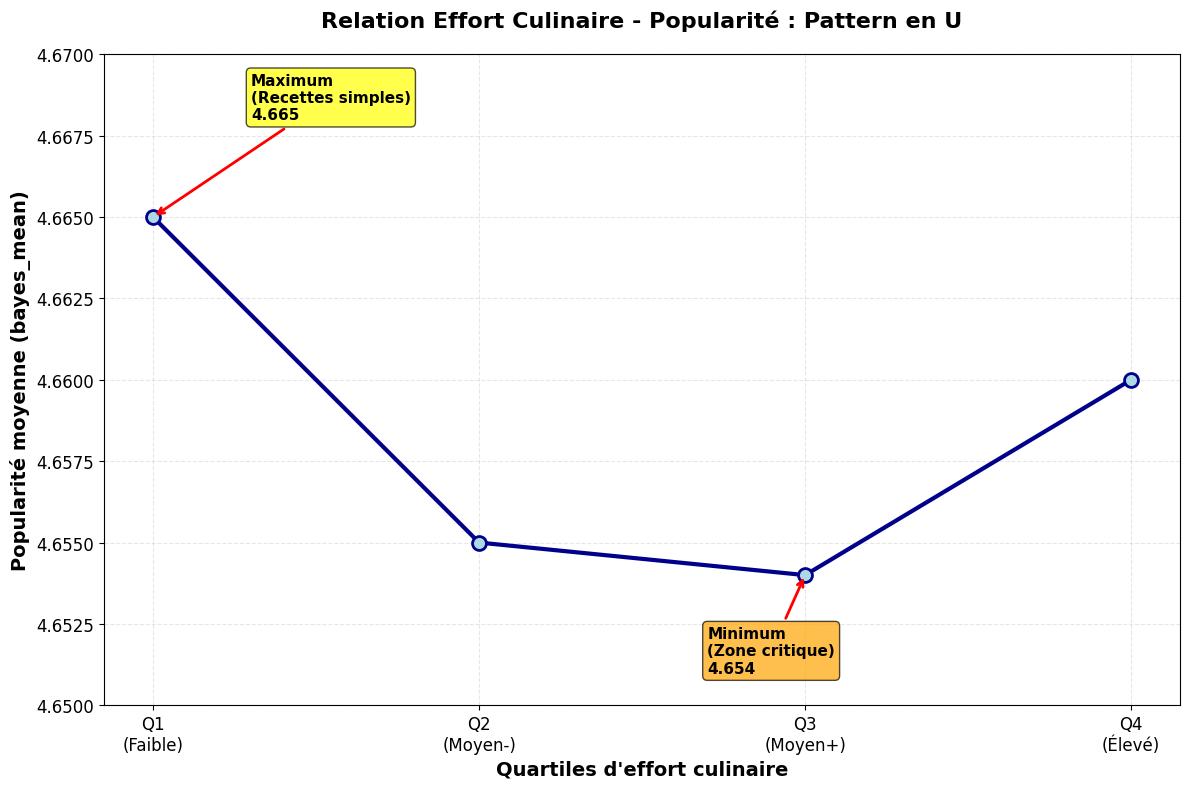

In [6]:
# Visualisation de la forme en U (version améliorée)
import matplotlib.pyplot as plt

# Données des quartiles
quartiles = ['Q1\n(Faible)', 'Q2\n(Moyen-)', 'Q3\n(Moyen+)', 'Q4\n(Élevé)']
popularite = [4.665, 4.655, 4.654, 4.660]

plt.figure(figsize=(12, 8))
plt.plot(quartiles, popularite, 'o-', linewidth=3, markersize=10, color='darkblue', markerfacecolor='lightblue', markeredgewidth=2)

# Titre et labels
plt.title('Relation Effort Culinaire - Popularité : Pattern en U', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Quartiles d\'effort culinaire', fontsize=14, fontweight='bold')
plt.ylabel('Popularité moyenne (bayes_mean)', fontsize=14, fontweight='bold')

# Grille plus subtile
plt.grid(True, alpha=0.3, linestyle='--')

# Annotations améliorées
plt.annotate('Maximum\n(Recettes simples)\n4.665', 
             xy=(0, 4.665), xytext=(0.3, 4.668),
             arrowprops=dict(arrowstyle='->', color='red', lw=2),
             fontsize=11, fontweight='bold', 
             bbox=dict(boxstyle="round,pad=0.3", facecolor='yellow', alpha=0.7))

plt.annotate('Minimum\n(Zone critique)\n4.654', 
             xy=(2, 4.654), xytext=(1.7, 4.651),
             arrowprops=dict(arrowstyle='->', color='red', lw=2),
             fontsize=11, fontweight='bold',
             bbox=dict(boxstyle="round,pad=0.3", facecolor='orange', alpha=0.7))

# Amélioration des axes
plt.ylim(4.65, 4.67)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

---

## Analyse des relations non linéaires effort-popularité

Données initiales: 221813 lignes
Données après nettoyage: 217062 lignes
Lignes supprimées (NaN): 4751


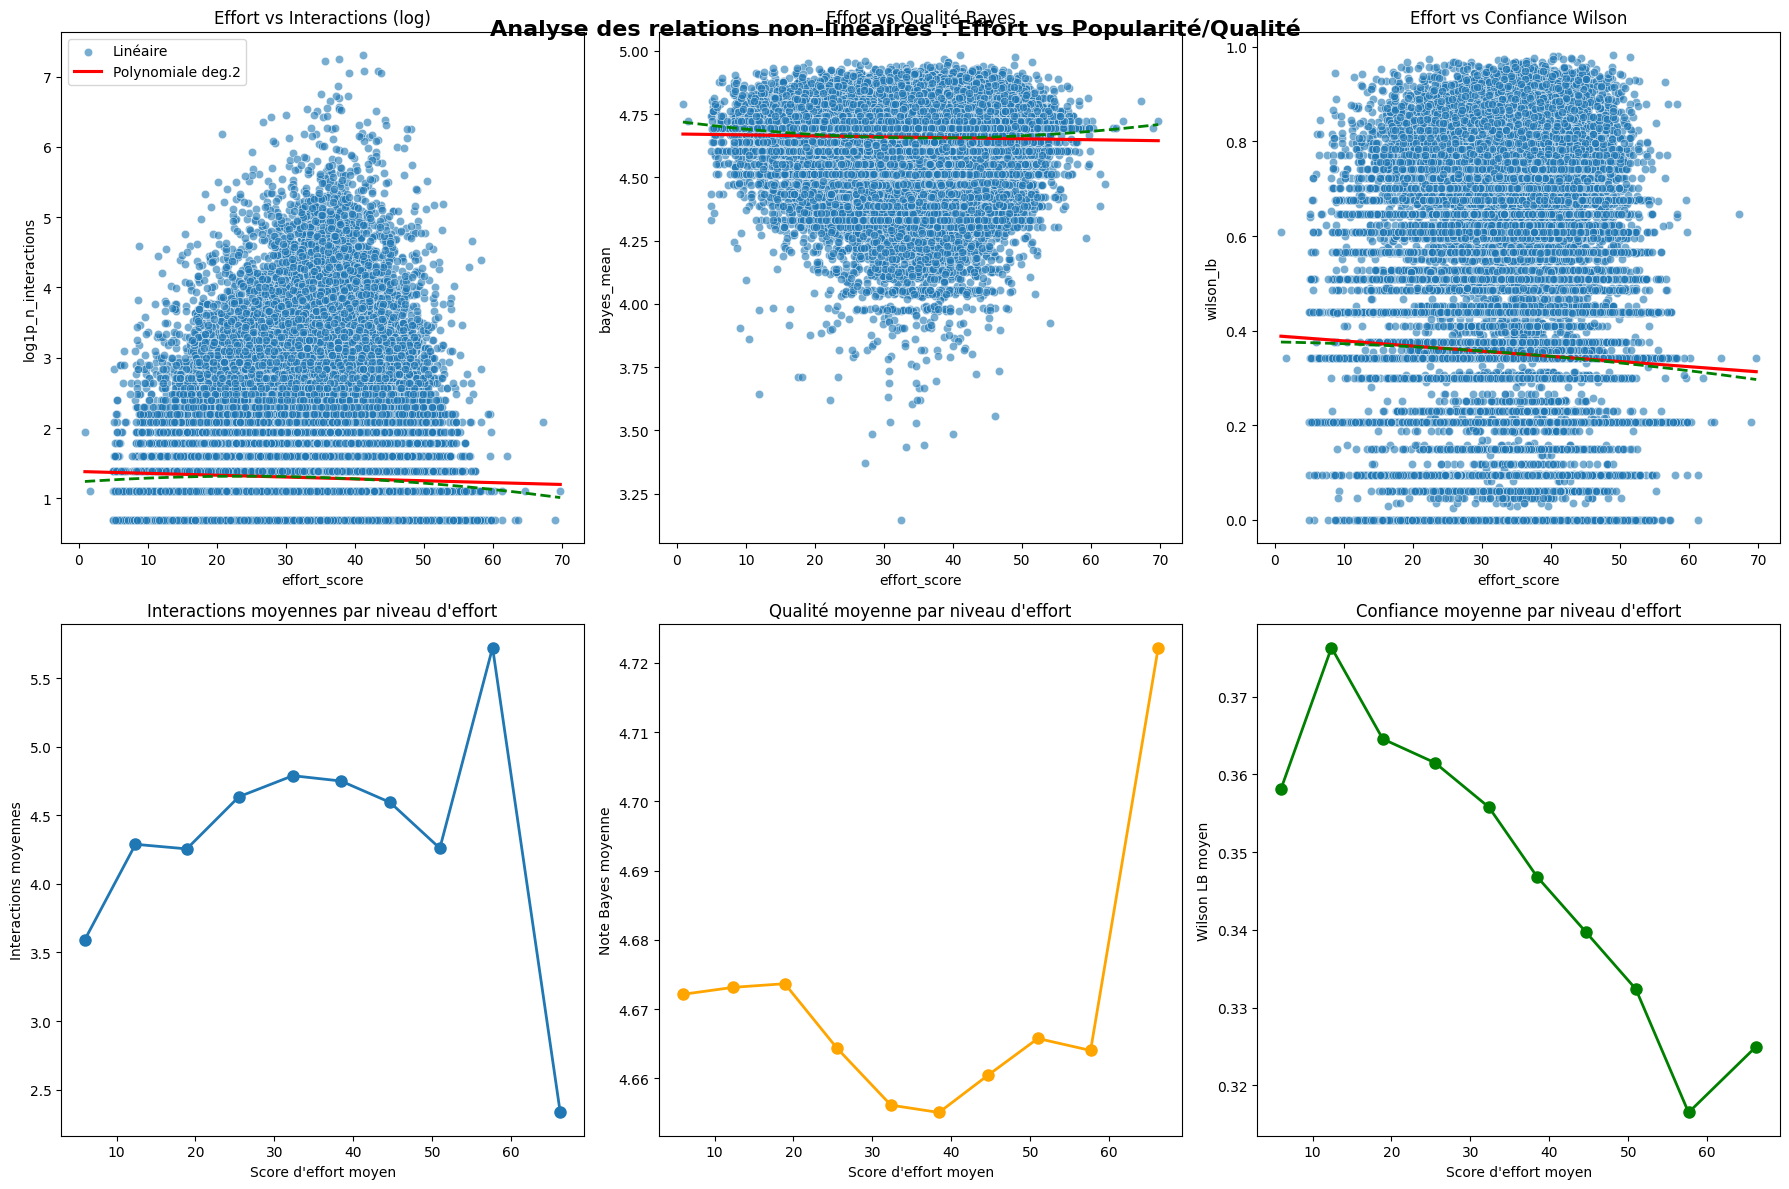

=== ANALYSE DE NON-LINÉARITÉ ===

Corrélations Effort vs Interactions:
Pearson (linéaire): 0.002
Spearman (monotone): -0.035
→ Relation potentiellement non-linéaire détectée

Corrélations Effort vs Qualité:
Pearson (linéaire): -0.026
Spearman (monotone): -0.026

Corrélations Effort vs Confiance:
Pearson (linéaire): -0.039
Spearman (monotone): -0.039


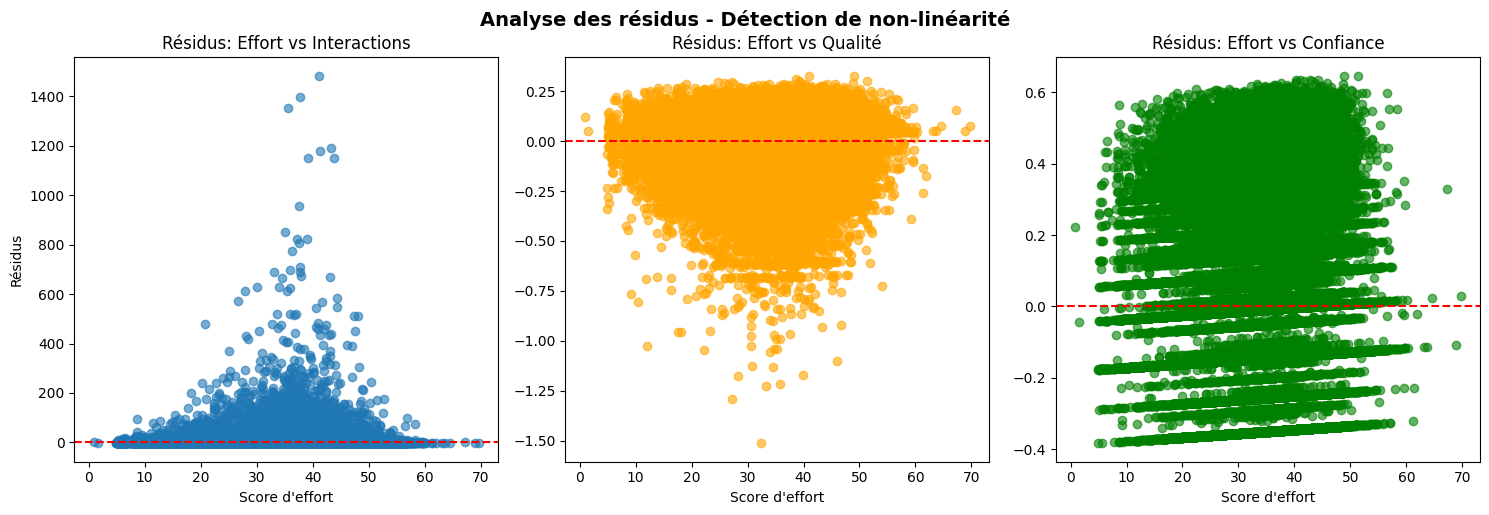

In [7]:
# Analyse des relations non linéaires effort-popularité

# 1. Nettoyer les données en supprimant les NaN
recipe = pd.read_csv("analysis_dataset.csv")
df = recipe
# Créer un dataset propre avec toutes les colonnes nécessaires
df_clean = df[['effort_score', 'n_interactions', 'log1p_n_interactions', 'bayes_mean', 'wilson_lb']].dropna()

print(f"Données initiales: {len(df)} lignes")
print(f"Données après nettoyage: {len(df_clean)} lignes")
print(f"Lignes supprimées (NaN): {len(df) - len(df_clean)}")

# 2. Scatter plots complets avec différents types de régression
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Effort vs Volume d'interactions (log)
sns.scatterplot(data=df_clean, x='effort_score', y='log1p_n_interactions', alpha=0.6, ax=axes[0,0])
sns.regplot(data=df_clean, x='effort_score', y='log1p_n_interactions', scatter=False, color='red', ax=axes[0,0])
# Ajout régression polynomiale
z = np.polyfit(df_clean['effort_score'], df_clean['log1p_n_interactions'], 2)
p = np.poly1d(z)
axes[0,0].plot(df_clean['effort_score'].sort_values(), p(df_clean['effort_score'].sort_values()), "--", color='green', linewidth=2)
axes[0,0].set_title('Effort vs Interactions (log)')
axes[0,0].legend(['Linéaire', 'Polynomiale deg.2'], loc='upper left')

# Effort vs Qualité Bayes
sns.scatterplot(data=df_clean, x='effort_score', y='bayes_mean', alpha=0.6, ax=axes[0,1])
sns.regplot(data=df_clean, x='effort_score', y='bayes_mean', scatter=False, color='red', ax=axes[0,1])
z2 = np.polyfit(df_clean['effort_score'], df_clean['bayes_mean'], 2)
p2 = np.poly1d(z2)
axes[0,1].plot(df_clean['effort_score'].sort_values(), p2(df_clean['effort_score'].sort_values()), "--", color='green', linewidth=2)
axes[0,1].set_title('Effort vs Qualité Bayes')

# Effort vs Wilson LB
sns.scatterplot(data=df_clean, x='effort_score', y='wilson_lb', alpha=0.6, ax=axes[0,2])
sns.regplot(data=df_clean, x='effort_score', y='wilson_lb', scatter=False, color='red', ax=axes[0,2])
z3 = np.polyfit(df_clean['effort_score'], df_clean['wilson_lb'], 2)
p3 = np.poly1d(z3)
axes[0,2].plot(df_clean['effort_score'].sort_values(), p3(df_clean['effort_score'].sort_values()), "--", color='green', linewidth=2)
axes[0,2].set_title('Effort vs Confiance Wilson')

# 3. Analyse par bins d'effort pour détecter non-linéarité
# Créer des bins d'effort sur les données nettoyées
df_clean['effort_bins'] = pd.cut(df_clean['effort_score'], bins=10, labels=False)
binned_analysis = df_clean.groupby('effort_bins').agg({
    'effort_score': 'mean',
    'n_interactions': 'mean',
    'bayes_mean': 'mean',
    'wilson_lb': 'mean'
}).reset_index()

# Interactions par bins
axes[1,0].plot(binned_analysis['effort_score'], binned_analysis['n_interactions'], 'o-', linewidth=2, markersize=8)
axes[1,0].set_title('Interactions moyennes par niveau d\'effort')
axes[1,0].set_xlabel('Score d\'effort moyen')
axes[1,0].set_ylabel('Interactions moyennes')

# Qualité par bins
axes[1,1].plot(binned_analysis['effort_score'], binned_analysis['bayes_mean'], 'o-', linewidth=2, markersize=8, color='orange')
axes[1,1].set_title('Qualité moyenne par niveau d\'effort')
axes[1,1].set_xlabel('Score d\'effort moyen')
axes[1,1].set_ylabel('Note Bayes moyenne')

# Wilson par bins
axes[1,2].plot(binned_analysis['effort_score'], binned_analysis['wilson_lb'], 'o-', linewidth=2, markersize=8, color='green')
axes[1,2].set_title('Confiance moyenne par niveau d\'effort')
axes[1,2].set_xlabel('Score d\'effort moyen')
axes[1,2].set_ylabel('Wilson LB moyen')

plt.tight_layout()
plt.suptitle('Analyse des relations non-linéaires : Effort vs Popularité/Qualité', 
             fontsize=16, fontweight='bold', y=0.98)
plt.show()

# 4. Test de non-linéarité avec corrélations de rang
from scipy.stats import spearmanr, pearsonr

print("=== ANALYSE DE NON-LINÉARITÉ ===")
print("\nCorrélations Effort vs Interactions:")
pearson_int, _ = pearsonr(df_clean['effort_score'], df_clean['n_interactions'])
spearman_int, _ = spearmanr(df_clean['effort_score'], df_clean['n_interactions'])
print(f"Pearson (linéaire): {pearson_int:.3f}")
print(f"Spearman (monotone): {spearman_int:.3f}")
if abs(spearman_int) > abs(pearson_int) * 1.1:
    print("→ Relation potentiellement non-linéaire détectée")

print("\nCorrélations Effort vs Qualité:")
pearson_qual, _ = pearsonr(df_clean['effort_score'], df_clean['bayes_mean'])
spearman_qual, _ = spearmanr(df_clean['effort_score'], df_clean['bayes_mean'])
print(f"Pearson (linéaire): {pearson_qual:.3f}")
print(f"Spearman (monotone): {spearman_qual:.3f}")

print("\nCorrélations Effort vs Confiance:")
pearson_conf, _ = pearsonr(df_clean['effort_score'], df_clean['wilson_lb'])
spearman_conf, _ = spearmanr(df_clean['effort_score'], df_clean['wilson_lb'])
print(f"Pearson (linéaire): {pearson_conf:.3f}")
print(f"Spearman (monotone): {spearman_conf:.3f}")

# 5. Analyse des résidus pour détecter patterns non-linéaires
from sklearn.linear_model import LinearRegression
import numpy as np

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Résidus pour interactions
X = df_clean[['effort_score']].values
y_int = df_clean['n_interactions'].values
model_int = LinearRegression().fit(X, y_int)
residuals_int = y_int - model_int.predict(X)

axes[0].scatter(df_clean['effort_score'], residuals_int, alpha=0.6)
axes[0].axhline(y=0, color='red', linestyle='--')
axes[0].set_title('Résidus: Effort vs Interactions')
axes[0].set_xlabel('Score d\'effort')
axes[0].set_ylabel('Résidus')

# Résidus pour qualité
y_qual = df_clean['bayes_mean'].values
model_qual = LinearRegression().fit(X, y_qual)
residuals_qual = y_qual - model_qual.predict(X)

axes[1].scatter(df_clean['effort_score'], residuals_qual, alpha=0.6, color='orange')
axes[1].axhline(y=0, color='red', linestyle='--')
axes[1].set_title('Résidus: Effort vs Qualité')
axes[1].set_xlabel('Score d\'effort')

# Résidus pour confiance
y_conf = df_clean['wilson_lb'].values
model_conf = LinearRegression().fit(X, y_conf)
residuals_conf = y_conf - model_conf.predict(X)

axes[2].scatter(df_clean['effort_score'], residuals_conf, alpha=0.6, color='green')
axes[2].axhline(y=0, color='red', linestyle='--')
axes[2].set_title('Résidus: Effort vs Confiance')
axes[2].set_xlabel('Score d\'effort')

plt.tight_layout()
plt.suptitle('Analyse des résidus - Détection de non-linéarité', fontsize=14, fontweight='bold', y=1.02)
plt.show()

## Essai de prédiction de 'bayes_mean' en fonction de 'log_minutes', 'n_ingredients', 'avg_words_per_step', 'effort_score'

 Nous savons par avance que cela n'est pas possible plus les variables sont peu corrélées.


=== PRÉPARATION DES DONNÉES ===
Données initiales: 221813 lignes
Données après nettoyage: 217062 lignes
Lignes supprimées (NaN): 4751

Variables prédictives (X): ['log_minutes', 'n_ingredients', 'avg_words_per_step', 'effort_score']
Variable cible (y): bayes_mean
Forme des données X: (217062, 4)
Forme des données y: (217062,)

Données d'entraînement: 173649 échantillons
Données de test: 43413 échantillons

=== ENTRAÎNEMENT DES MODÈLES ===

=== ÉVALUATION DES MODÈLES ===

Régression Linéaire:
  RMSE: 0.1061
  MAE:  0.0779
  R²:   0.0021

Random Forest:
  RMSE: 0.1153
  MAE:  0.0841
  R²:   -0.1785


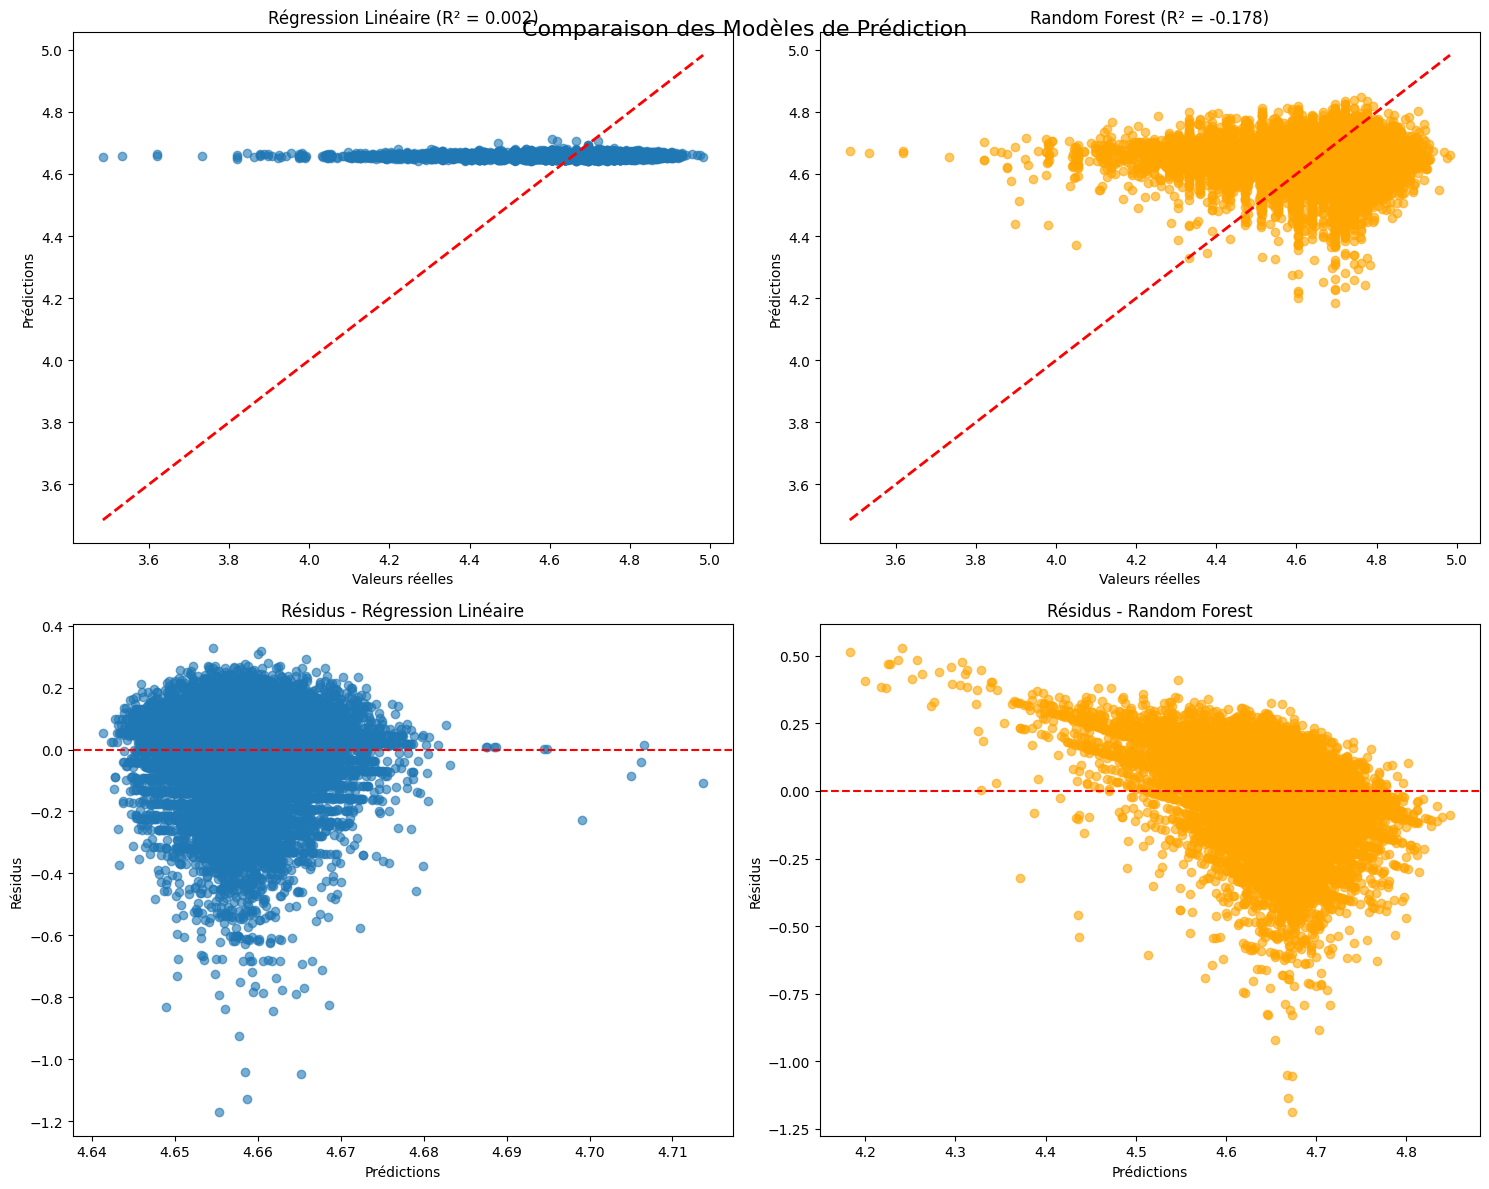

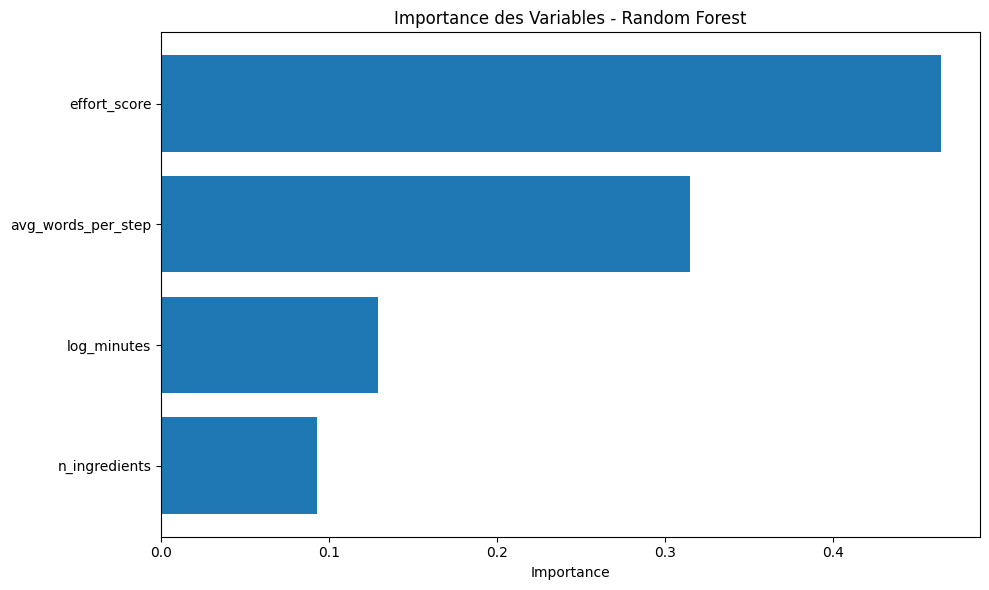


=== IMPORTANCE DES VARIABLES ===
              feature  importance
3        effort_score    0.464007
2  avg_words_per_step    0.314480
0         log_minutes    0.128966
1       n_ingredients    0.092547

=== COEFFICIENTS RÉGRESSION LINÉAIRE ===
              feature  coefficient
0         log_minutes    -0.005285
2  avg_words_per_step     0.002444
3        effort_score     0.000876
1       n_ingredients     0.000799

=== EXEMPLES DE PRÉDICTIONS ===
Comparaison Réalité vs Prédictions (5 exemples):
Indice | Réel   | LR     | RF     | Features
------------------------------------------------------------
 11364 | 4.743 | 4.664 | 4.675 | [ 2.99573227  4.         16.36363636 28.3678112 ]
 33037 | 4.743 | 4.657 | 4.668 | [ 3.55534806 10.          7.36363636 36.05170629]
 42617 | 4.696 | 4.662 | 4.703 | [ 2.7080502   8.         10.66666667 29.32312059]
 35436 | 4.589 | 4.664 | 4.583 | [ 3.21887582 14.         14.25       37.0155545 ]
  6375 | 4.435 | 4.661 | 4.621 | [ 3.68887945 15.         1

In [8]:
# Modèle de prédiction du score de popularité des recettes

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Préparation des données
print("=== PRÉPARATION DES DONNÉES ===")
colonnes = ['log_minutes', 'n_ingredients', 'avg_words_per_step', 'bayes_mean', 'effort_score', 'wilson_lb', 'n_interactions']
recipe_model = recipe[colonnes].copy()

# Supprimer les lignes avec des NaN
recipe_clean = recipe_model.dropna()
print(f"Données initiales: {len(recipe_model)} lignes")
print(f"Données après nettoyage: {len(recipe_clean)} lignes")
print(f"Lignes supprimées (NaN): {len(recipe_model) - len(recipe_clean)}")

# 2. Définir X (variables prédictives) et y (variable cible)
X_features = ['log_minutes', 'n_ingredients', 'avg_words_per_step', 'effort_score']
X = recipe_clean[X_features]
y = recipe_clean['bayes_mean']  # Variable cible : score de popularité

print(f"\nVariables prédictives (X): {X_features}")
print(f"Variable cible (y): bayes_mean")
print(f"Forme des données X: {X.shape}")
print(f"Forme des données y: {y.shape}")

# 3. Division train/test (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

print(f"\nDonnées d'entraînement: {X_train.shape[0]} échantillons")
print(f"Données de test: {X_test.shape[0]} échantillons")

# 4. Standardisation des features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Entraînement de plusieurs modèles
print("\n=== ENTRAÎNEMENT DES MODÈLES ===")

# Modèle 1: Régression linéaire
model_lr = LinearRegression()
model_lr.fit(X_train_scaled, y_train)

# Modèle 2: Random Forest
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)  # Random Forest n'a pas besoin de standardisation

# 6. Prédictions
y_pred_lr = model_lr.predict(X_test_scaled)
y_pred_rf = model_rf.predict(X_test)

# 7. Évaluation des modèles
print("\n=== ÉVALUATION DES MODÈLES ===")

def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"\n{model_name}:")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  MAE:  {mae:.4f}")
    print(f"  R²:   {r2:.4f}")
    
    return {'rmse': rmse, 'mae': mae, 'r2': r2}

results_lr = evaluate_model(y_test, y_pred_lr, "Régression Linéaire")
results_rf = evaluate_model(y_test, y_pred_rf, "Random Forest")

# 8. Visualisation des résultats
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Graphique 1: Prédictions vs Réalité - Régression Linéaire
axes[0,0].scatter(y_test, y_pred_lr, alpha=0.6)
axes[0,0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0,0].set_xlabel('Valeurs réelles')
axes[0,0].set_ylabel('Prédictions')
axes[0,0].set_title(f'Régression Linéaire (R² = {results_lr["r2"]:.3f})')

# Graphique 2: Prédictions vs Réalité - Random Forest
axes[0,1].scatter(y_test, y_pred_rf, alpha=0.6, color='orange')
axes[0,1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0,1].set_xlabel('Valeurs réelles')
axes[0,1].set_ylabel('Prédictions')
axes[0,1].set_title(f'Random Forest (R² = {results_rf["r2"]:.3f})')

# Graphique 3: Résidus - Régression Linéaire
residuals_lr = y_test - y_pred_lr
axes[1,0].scatter(y_pred_lr, residuals_lr, alpha=0.6)
axes[1,0].axhline(y=0, color='r', linestyle='--')
axes[1,0].set_xlabel('Prédictions')
axes[1,0].set_ylabel('Résidus')
axes[1,0].set_title('Résidus - Régression Linéaire')

# Graphique 4: Résidus - Random Forest
residuals_rf = y_test - y_pred_rf
axes[1,1].scatter(y_pred_rf, residuals_rf, alpha=0.6, color='orange')
axes[1,1].axhline(y=0, color='r', linestyle='--')
axes[1,1].set_xlabel('Prédictions')
axes[1,1].set_ylabel('Résidus')
axes[1,1].set_title('Résidus - Random Forest')

plt.tight_layout()
plt.suptitle('Comparaison des Modèles de Prédiction', fontsize=16, y=0.98)
plt.show()

# 9. Importance des features (Random Forest)
feature_importance = pd.DataFrame({
    'feature': X_features,
    'importance': model_rf.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.title('Importance des Variables - Random Forest')
plt.xlabel('Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("\n=== IMPORTANCE DES VARIABLES ===")
print(feature_importance)

# 10. Coefficients du modèle linéaire
coeffs_lr = pd.DataFrame({
    'feature': X_features,
    'coefficient': model_lr.coef_
}).sort_values('coefficient', key=abs, ascending=False)

print("\n=== COEFFICIENTS RÉGRESSION LINÉAIRE ===")
print(coeffs_lr)

# 11. Test sur quelques exemples
print("\n=== EXEMPLES DE PRÉDICTIONS ===")
# Prendre 5 exemples du jeu de test
sample_indices = np.random.choice(len(X_test), 5, replace=False)

print("Comparaison Réalité vs Prédictions (5 exemples):")
print("Indice | Réel   | LR     | RF     | Features")
print("-" * 60)

for i, idx in enumerate(sample_indices):
    real_val = y_test.iloc[idx]
    pred_lr = y_pred_lr[idx]
    pred_rf = y_pred_rf[idx]
    features = X_test.iloc[idx].values
    
    print(f"{idx:6d} | {real_val:.3f} | {pred_lr:.3f} | {pred_rf:.3f} | {features}")

# 12. Résumé final
print("\n=== RÉSUMÉ FINAL ===")
if results_rf['r2'] > results_lr['r2']:
    best_model = "Random Forest"
    best_r2 = results_rf['r2']
    best_rmse = results_rf['rmse']
else:
    best_model = "Régression Linéaire" 
    best_r2 = results_lr['r2']
    best_rmse = results_lr['rmse']

print(f"Meilleur modèle: {best_model}")
print(f"R² du meilleur modèle: {best_r2:.4f}")
print(f"RMSE du meilleur modèle: {best_rmse:.4f}")
print(f"Le modèle explique {best_r2*100:.1f}% de la variance dans les scores de popularité")

## Interprétation des résultats de prédiction de bayes_mean


Globalement :


* R² est extrêmement faible : 0.0021 (0.2%) → Le modèle n'explique quasiment rien. Random Forest obtient des prédictions plus mauvaises que si les prédictions se basaient sur `bayes_mean`.
* Random Forest les résultats sont "pire" : R² = -0.1785 (performance négative).
* RMSE = 0.1061 sur une échelle de notes ~4.5-4.7 → L'erreur est donc significative.


Observations clés :


1. Prédictibilité quasi-nulle

Les caractéristiques techniques des recettes ne permettent pas de prédire la qualité perçue,`bayes_mean`, le résultat est identique pour `wilson_lb`.
$\rightarrow$ échec des modèles


2. Variables importantes (Random Forest)

On essaye de prédire le score de popularité (`bayes_mean`), à partir des caractéristiques techniques des recettes (temps, ingrédients, complexité des instructions et effort).

Les variables d'importances établies par le modèle Random Forest :
* effort_score : 46.4% (mais impact très limité).
* avg_words_per_step : 31.4%.
* log_minutes et n_ingredients : importance moindre.



## Conclusion


La qualité perçue des recettes (`bayes_mean`) est tout aussi imprévisible que la popularité (wilson_lb). Les données semblent insuffisantes pour prédire la popularité.

Cela suggère que :
* Les notes dépendent de facteurs subjectifs non mesurables (goût, présentation, clarté des instructions)
* L'expérience utilisateur prime sur les caractéristiques techniques
* Les variables disponibles sont insuffisantes pour modéliser la satisfaction
* Cette analyse confirme que le succès culinaire ne se résume pas à des métriques simples !

---

## Conclusion générale

### Les questions de départ
"Les recettes compliquées sont-elles moins populaires que les recettes simples ?"
"L'effort culinaire impacte il la popularité des recettes ?"


### Découvertes lors des analyses:
L'effort culinaire n'influence pratiquement pas la popularité des recettes.

En effet :

* Il y a une très faible relation entre ces deux variables. Cette correlation existe, mais elle est négative et surtout quasi-nulle (-0.026).

* L'effort n'explique que 0.07% de la popularité d'une recette, ce qui induit que son effet est négligable sur la popularité.


### Autres pistes

Pattern intéressant : Lorsque l'on groupe les recettes par niveau d'effort, on observe une très légère courbe en U qui laissent supposer que:

* Les recettes très simples sont les plus populaires
* Les recettes moyennement complexes sont légèrement moins appréciées
* Les recettes très complexes retrouvent un peu de popularité

### Pour le point de vu final de la WebApp

* Cible de la Webapp = les créateurs/ rédacteurs de recettes : La simplicité peut légèrement favoriser la popularité, mais ce n'est pas déterminant. En effet, la popularité dépend d'autres facteurs : goût, présentation, originalité, marketing, etc.

* Il existe deux publics distincts :le  grand public (recette simple) et les passionés (recettes complexes).




---

### Suggestions pour la WebApp

**Problème** :
Nous avons effectué des tests de corrélations/ prédictions pour notre problématique " l'effort culinaire a t il un impact sur la popularité ? ".
Cependant, les résultats montrent qu'il n'y a pas de corrélation entre l'effort culinaire et la popularité.
Ainsi, nous ne savons pas quoi mettre en valeur dans la webapp, puisqu'aucune des features ne sont corrélées.

**Propositions pour la webapp**
1. "Webapp de tips à destination des rédacteurs de recettes souhaitant rendre leurs recettes plus populaire".

Proposer des graphiques qui illustrent, pour chaque catégorie d'effort (facile, modéré, difficile)  le nombre de recette déjà présente (=> conserver la répartition des recettes dans les catégories sans répartition équitable).

Proposer un graphique croisé avec pour chaque catégorie d'effort, la popularité de visible.

Cas d'usage: Le rédacteur de la recette pourra voir que les recettes qui plaisent sont les recettes faciles

Cas d'usage impliquant le traitement des saisons : Le rédacteur de recette pourra voir que les recettes qui plaisent le plus à une certaine saison sont les recettes faciles ou autres.

/!\ Problème de cette proposition: il n'y a pas de corrélation entre le score d'effort et le score de popularité => Que faire ?

2. Webapp à destination des CEO de foodrecipe (les gens qui tiennent le site) - Preuves que de nouvelles fonctionnalités doivent être mises en place pour que les deux variables de scores puissent amener à des résultats exploitables.

Dans un premier temps on illustre la non corrélation à destination de novices du sujet, en vulgarisant notre analyse (=> utilisation des graphiques que l'on a produit dans les analyses tq la matrice de correlation etc).

Puis dans un second temps on apporte des conseils pour résoudre les pbms que l'on a pu rencontrer  :
* forcer les utilisateurs à donner des notes à chaque fois qu'ils effectuaient une recette => n_ratings logique
* forcer les personnes qui rédigent les recettes à respecter un nombre de caractère maximal pour les steps => 
* proposer une solution de calcul automatique pour le temps que prendrait une recette => n_minutes exhaustifs.